In [5]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import numpy as np
import pandas as pd

from util import engineer_features, prep_X_y

DATA_DIR = Path("./pistachio_1_data")
dyads_df = pd.read_csv(DATA_DIR / "all_dyads.csv")

sorted_dyads_df = dyads_df.sort_values(
    by="ActivityDateTime", key=lambda x: pd.to_datetime(x)
)
cleaned_dyads_dfs = engineer_features(sorted_dyads_df)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/var/folders/gv/lj5cf4w14fqc6937ndlg7qb40000gr/T/ipykernel_8110/6524477.py:12: DtypeWarning: Columns (95,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  dyads_df = pd.read_csv(DATA_DIR / "all_dyads.csv")
/Users/zhu.henian/projects/pistachio/util.py:150: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df["ActivityDateTime"]) - pd.to_datetime(df["Therapy Start"])


In [6]:
from hr_model import HrModel
from modeling import (
    TuningMethod,
    eval_model_on_feature_sets,
    retrain_and_predict,
    supersets_to_test,
)

In [3]:
import os

# Params
weeks = (0, 15)
active_hours = (7, 20)
tuning_method: TuningMethod = "balanced_accuracy"
estimator = "xgboost"
random_state = 42
os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"

In [7]:
no_retrain_results = eval_model_on_feature_sets(
    supersets_to_test=supersets_to_test,
    dfs=cleaned_dyads_dfs,
    weeks=weeks,
    active_hours=active_hours,
    estimator=estimator,
    mode="no_retrain",
    tuning_method=tuning_method,
    random_state=random_state,
    verbose=True,
)

Feature sets: watch


  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.4776521507349728 sensitivity: 0.41452991452991456, specificity: 0.48047034764826174
Week 1 AUROC: 0.6006113891311999 sensitivity: 0.7101449275362319, specificity: 0.47222808870116156
Week 2 AUROC: 0.5762522695717184 sensitivity: 0.56, specificity: 0.4837124853145359
Week 3 AUROC: 0.5835972854519098 sensitivity: 0.6376811594202898, specificity: 0.5059732958538299
Week 4 AUROC: 0.5675228768441397 sensitivity: 0.5862068965517241, specificity: 0.5302230750779563
Week 5 AUROC: 0.5194638234091838 sensitivity: 0.5487804878048781, specificity: 0.5288268156424581
Week 6 AUROC: 0.48455718873517784 sensitivity: 0.525, specificity: 0.4592391304347826
Week 7 AUROC: 0.6185053908995916 sensitivity: 0.7909090909090909, specificity: 0.45128004179728315
Week 8 AUROC: 0.48061324028985813 sensitivity: 0.5851063829787234, specificity: 0.4718240237271379
Week 9 AUROC: 0.585816333172165 sensitivity: 0.6696428571428571, specificity: 0.4536579015881281
Week 10 AUROC: 0.5243585444835128 sensitiv

  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.4792225980109416 sensitivity: 0.6282051282051282, specificity: 0.38333333333333336
Week 1 AUROC: 0.5236771089991787 sensitivity: 0.6280193236714976, specificity: 0.4465681098204857
Week 2 AUROC: 0.5366741429029157 sensitivity: 0.72, specificity: 0.439495888070063
Week 3 AUROC: 0.5698772919700842 sensitivity: 0.7463768115942029, specificity: 0.3772546263762005
Week 4 AUROC: 0.505460390457206 sensitivity: 0.5402298850574713, specificity: 0.44303190213480453
Week 5 AUROC: 0.5584820820275243 sensitivity: 0.6585365853658537, specificity: 0.4427932960893855
Week 6 AUROC: 0.5396322257905138 sensitivity: 0.675, specificity: 0.3900691699604743
Week 7 AUROC: 0.48845290681105735 sensitivity: 0.6, specificity: 0.3680773249738767
Week 8 AUROC: 0.5567332064239965 sensitivity: 0.723404255319149, specificity: 0.43215521502718734
Week 9 AUROC: 0.38539012812883544 sensitivity: 0.36607142857142855, specificity: 0.40002603488674826
Week 10 AUROC: 0.44141262188712077 sensitivity: 0.55952380

  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.505228269798822 sensitivity: 0.4829059829059829, specificity: 0.5056237218813906
Week 1 AUROC: 0.64305995541476 sensitivity: 0.6328502415458938, specificity: 0.5713833157338966
Week 2 AUROC: 0.5549866495781266 sensitivity: 0.52, specificity: 0.5764178148029477
Week 3 AUROC: 0.6185603321553091 sensitivity: 0.5507246376811594, specificity: 0.5888966971187631
Week 4 AUROC: 0.6096282633449406 sensitivity: 0.5977011494252874, specificity: 0.5959462700887503
Week 5 AUROC: 0.5819941408911296 sensitivity: 0.6707317073170732, specificity: 0.5099441340782123
Week 6 AUROC: 0.5887398097826086 sensitivity: 0.625, specificity: 0.5423666007905138
Week 7 AUROC: 0.5077645578037429 sensitivity: 0.41818181818181815, specificity: 0.5229885057471264
Week 8 AUROC: 0.6571291845899812 sensitivity: 0.6808510638297872, specificity: 0.536950074147306
Week 9 AUROC: 0.487118542418269 sensitivity: 0.36607142857142855, specificity: 0.6027076282218172
Week 10 AUROC: 0.5563172871279951 sensitivity: 0.4

  0%|          | 0/16 [00:00<?, ?it/s]

Week 0 AUROC: 0.5575931169489452 sensitivity: 0.7478632478632479, specificity: 0.38312883435582823
Week 1 AUROC: 0.6780948227048038 sensitivity: 0.8647342995169082, specificity: 0.4149947201689546
Week 2 AUROC: 0.6234184200220727 sensitivity: 0.8333333333333334, specificity: 0.4004058528249493
Week 3 AUROC: 0.6471520330254175 sensitivity: 0.8913043478260869, specificity: 0.404427266338721
Week 4 AUROC: 0.5656129119417264 sensitivity: 0.7586206896551724, specificity: 0.4050131926121372
Week 5 AUROC: 0.5806581278103283 sensitivity: 0.7439024390243902, specificity: 0.38849162011173183
Week 6 AUROC: 0.5041857089920949 sensitivity: 0.725, specificity: 0.3757411067193676
Week 7 AUROC: 0.5293928707134036 sensitivity: 0.8727272727272727, specificity: 0.3640282131661442
Week 8 AUROC: 0.515825979953934 sensitivity: 0.7872340425531915, specificity: 0.374814631735047
Week 9 AUROC: 0.5806622391862237 sensitivity: 0.8482142857142857, specificity: 0.3702160895600104
Week 10 AUROC: 0.6187802829835308 

In [11]:
import warnings

warnings.filterwarnings("ignore")

test_case = [
    ["watch"],
    ["watch", "demographic"],
    ["watch", "medical"],
    ["watch", "demographic", "medical"],
]

retrain_dyad_results = eval_model_on_feature_sets(
    supersets_to_test=test_case,
    dfs=cleaned_dyads_dfs,
    weeks=weeks,
    active_hours=active_hours,
    estimator=estimator,
    mode="retrain_dyad",
    tuning_method=tuning_method,
    random_state=random_state,
    verbose=False,
)

Feature sets: watch


  0%|          | 0/15 [00:00<?, ?it/s]

Week 0 AUROC: 0.4827836330903815 sensitivity: 0.6324786324786325, specificity: 0.4004089979550102


  0%|          | 0/28 [00:00<?, ?it/s]

Week 1 AUROC: 0.6684829795591469 sensitivity: 0.6956521739130435, specificity: 0.5689545934530095


  0%|          | 0/28 [00:00<?, ?it/s]

Week 2 AUROC: 0.7455783402755527 sensitivity: 0.8533333333333334, specificity: 0.5582612410552173


  0%|          | 0/28 [00:00<?, ?it/s]

Week 3 AUROC: 0.773009240870312 sensitivity: 0.7101449275362319, specificity: 0.6882173811197002


  0%|          | 0/28 [00:00<?, ?it/s]

Week 4 AUROC: 0.6060316567549758 sensitivity: 0.5172413793103449, specificity: 0.6414008155432958


  0%|          | 0/28 [00:00<?, ?it/s]

Week 5 AUROC: 0.7592049325521188 sensitivity: 0.7317073170731707, specificity: 0.6405586592178771


  0%|          | 0/28 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Analysis


In [9]:
import pickle
from pathlib import Path

tuning_method: TuningMethod = "balanced_accuracy"
# tuning_method: TuningMethod = "ref_specificity"

models = ["lrl2", "xgboost"]

feature_sets = [
    "watch",
    "watch_demographic",
    "watch_medical",
    "watch_demographic_medical",
]
data_dir = Path("./intermediate_data")
no_retrain_results = {
    model: {
        k: pickle.load(
            open(data_dir / f"{model}_{tuning_method}_no_retrain_{k}_results.pkl", "rb")
        )
        for k in feature_sets
    }
    for model in models
}
retrain_dyad_results = {
    model: {
        k: pickle.load(
            open(
                data_dir / f"{model}_{tuning_method}_retrain_dyad_{k}_results.pkl", "rb"
            )
        )
        for k in feature_sets
    }
    for model in models
}

full_df = pd.concat(list(cleaned_dyads_dfs.values()), axis=1)
full_df = full_df[full_df["therapy_week"].between(weeks[0], weeks[1])]
full_df = full_df[
    (full_df["ActivityDateTime"].dt.hour.between(active_hours[0], active_hours[1]))
]
full_df_train = full_df[full_df["Arm_Sham"]]
full_df_test = full_df[~full_df["Arm_Sham"]]

X_train, y_train = prep_X_y(full_df_train, "tantrum_within_60m")

hr_model_results, _ = retrain_and_predict(
    HrModel(),
    full_df_train,
    full_df_test,
    mode="no_retrain",
    tuning_method=tuning_method,
)

  0%|          | 0/15 [00:00<?, ?it/s]

Week 0 AUROC: 0.4867259189345079 sensitivity: 0.36752136752136755, specificity: 0.6059304703476482
Week 1 AUROC: 0.5941054639874712 sensitivity: 0.5700483091787439, specificity: 0.6181626187961985
Week 2 AUROC: 0.5149065470468868 sensitivity: 0.44666666666666666, specificity: 0.5831464274271067
Week 3 AUROC: 0.5891716826056402 sensitivity: 0.572463768115942, specificity: 0.6058795970953385
Week 4 AUROC: 0.5212308693338628 sensitivity: 0.42528735632183906, specificity: 0.6171743823458863
Week 5 AUROC: 0.5199591224962529 sensitivity: 0.43902439024390244, specificity: 0.6008938547486034
Week 6 AUROC: 0.46044960474308305 sensitivity: 0.35, specificity: 0.570899209486166
Week 7 AUROC: 0.6026253918495298 sensitivity: 0.6272727272727273, specificity: 0.5779780564263323
Week 8 AUROC: 0.5611820447828695 sensitivity: 0.5212765957446809, specificity: 0.6010874938210579
Week 9 AUROC: 0.5501287797076654 sensitivity: 0.5178571428571429, specificity: 0.582400416558188
Week 10 AUROC: 0.559248921593504

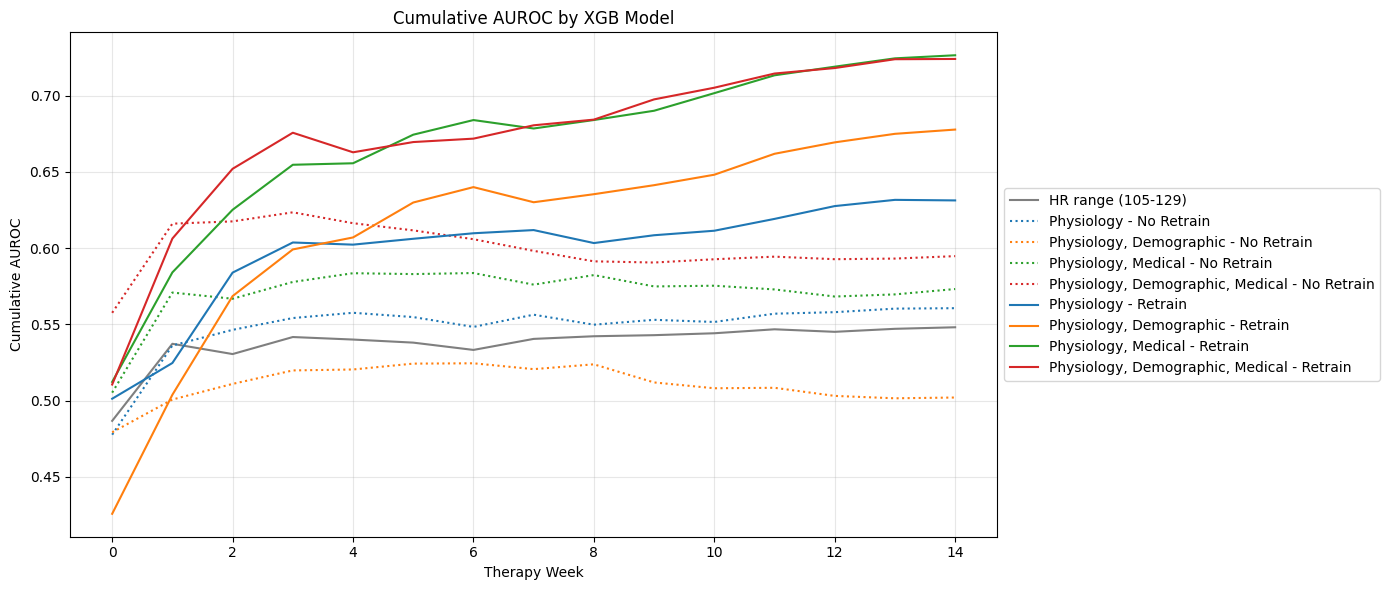

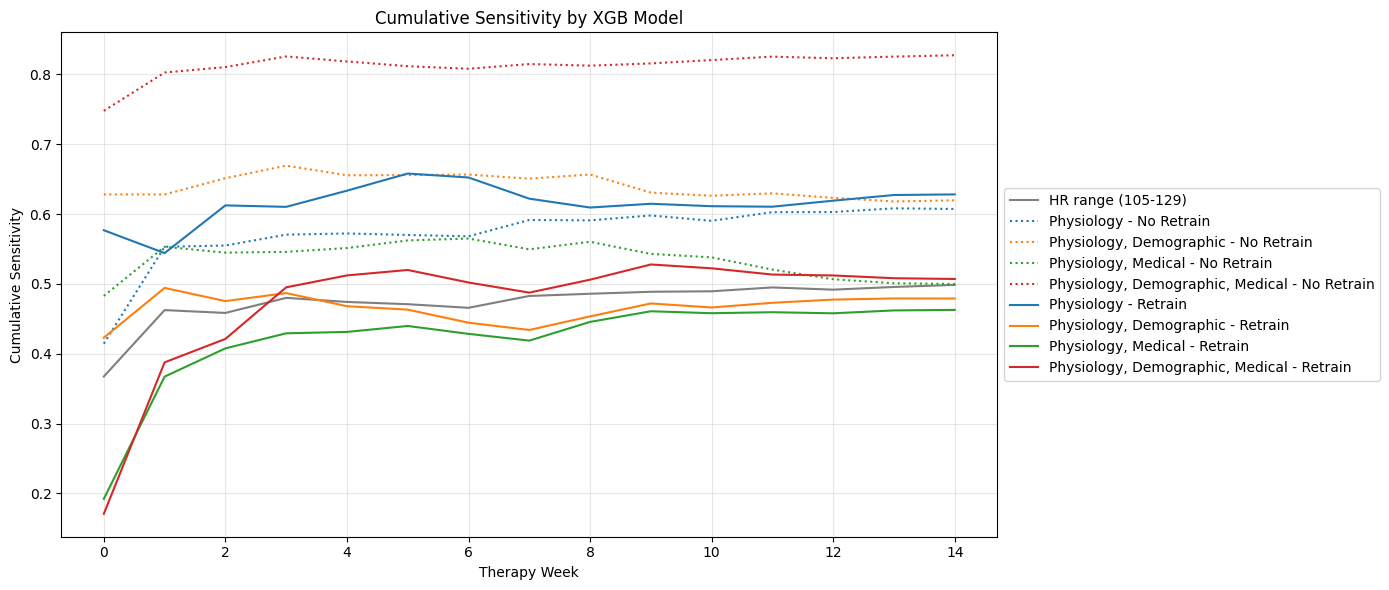

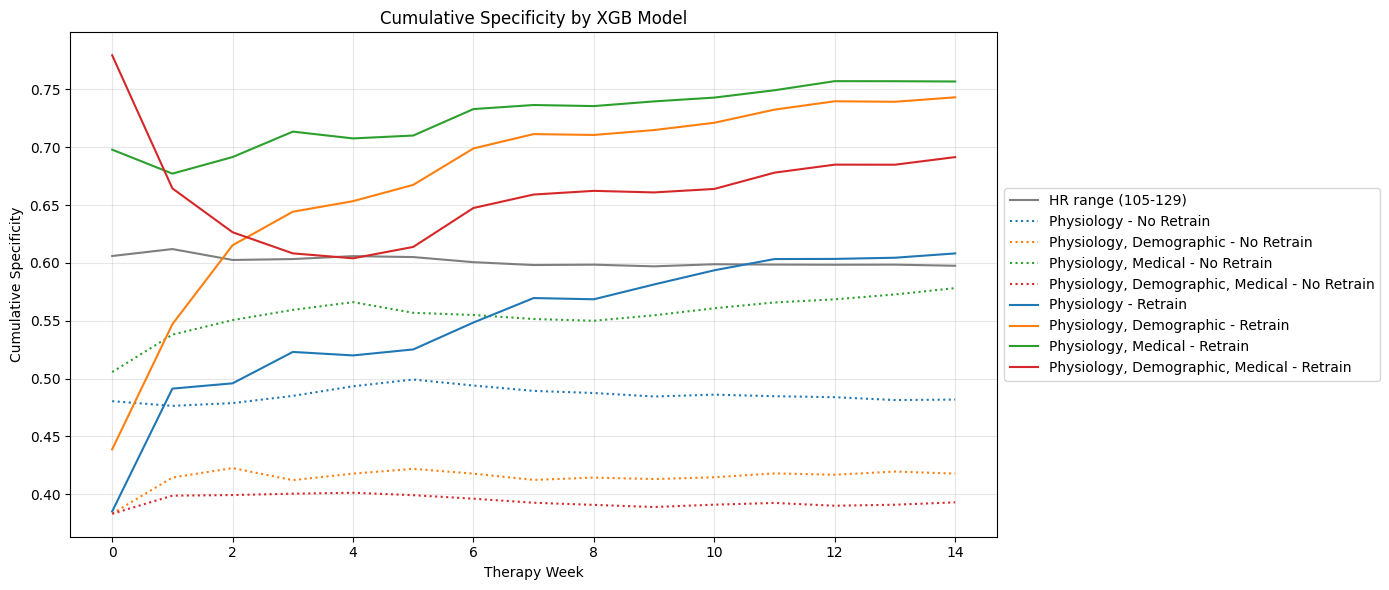

Week 0  \
                                                                      Sensitivity   
Model                                Feature Set                                    
HR range (reference)                 HR moving average                       0.37   
Static LR                            Physiology                              0.33   
                                     Physiology, Demographic                 0.34   
                                     Physiology, Medical                     0.69   
                                     Physiology, Demographic, Medical        0.71   
Individualized LR, retrained weekly  Physiology                              0.33   
                                     Physiology, Demographic                 0.34   
                                     Physiology, Medical                     0.69   
                                     Physiology, Demographic, Medical        0.71   
Static XGB                           Physiology                              0.41   
                                     Physiology, Demographic                 0.63   
                                     Physiology, Medical                     0.48   
                                     Physiology, Demographic, Medical        0.75   
Individualized XGB, retrained weekly Physiology                              0.58   
                                     Physiology, Demographic                 0.42   
                                     Physiology, Medical                     0.19   
                                     Physiology, Demographic, Medical        0.17   

                                                                                   \
                                                                      Specificity   
Model                                Feature Set                                    
HR range (reference)                 HR moving average                       0.61   
Static LR                            Physiology                              0.73   
                                     Physiology, Demographic                 0.73   
                                     Physiology, Medical                     0.46   
                                     Physiology, Demographic, Medical        0.46   
Individualized LR, retrained weekly  Physiology                              0.73   
                                     Physiology, Demographic                 0.73   
                                     Physiology, Medical                     0.46   
                                     Physiology, Demographic, Medical        0.46   
Static XGB                           Physiology                              0.48   
                                     Physiology, Demographic                 0.38   
                                     Physiology, Medical                     0.51   
                                     Physiology, Demographic, Medical        0.38   
Individualized XGB, retrained weekly Physiology                              0.39   
                                     Physiology, Demographic                 0.44   
                                     Physiology, Medical                     0.70   
                                     Physiology, Demographic, Medical        0.78   

                                                                             \
                                                                      AUROC   
Model                                Feature Set                              
HR range (reference)                 HR moving average                 0.49   
Static LR                            Physiology                        0.58   
                                     Physiology, Demographic           0.58   
                                     Physiology, Medical               0.60   
                                     Physiology, Demographic, Medical  0.59   
Individualized LR, retrained weekly  Phys

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import recall_score, roc_auc_score

from modeling import specificity_score

model_friendly_names = {
    "lrl2": "LR",
    "xgboost": "XGB",
}
weeks = (0, 14)


def plot_weekly_cum_metric(
    model: str, metric_name: str, weeks: tuple[int, ...], metric_fn
):
    def weekly_cum_metric(results, metric_fn):
        results = [r for r in results if r[0] <= weeks[-1]]
        metrics = []
        all_y_pred_proba = np.empty((0, 2))
        all_y_pred = np.array([])
        all_y_true = np.array([])
        for week, y_pred_proba, y_pred, y_true, _ in results:
            all_y_pred_proba = np.concatenate([all_y_pred_proba, y_pred_proba])
            all_y_pred = np.concatenate([all_y_pred, y_pred])
            all_y_true = np.concatenate([all_y_true, y_true])

            if metric_fn is roc_auc_score:
                metric = metric_fn(all_y_true, all_y_pred_proba[:, 1])
            else:
                metric = metric_fn(all_y_true, all_y_pred)
            metrics.append((week, metric))
        return metrics

    hr_cum_auc = weekly_cum_metric(hr_model_results, metric_fn)
    no_retrain_watch_cum_auc = weekly_cum_metric(
        no_retrain_results[model]["watch"], metric_fn
    )
    no_retrain_demographic_cum_auc = weekly_cum_metric(
        no_retrain_results[model]["watch_demographic"], metric_fn
    )
    no_retrain_medical_metric = weekly_cum_metric(
        no_retrain_results[model]["watch_medical"], metric_fn
    )
    no_retrain_all_features_metric = weekly_cum_metric(
        no_retrain_results[model]["watch_demographic_medical"], metric_fn
    )
    retrain_watch_cum_auc = weekly_cum_metric(
        retrain_dyad_results[model]["watch"], metric_fn
    )
    retrain_demographic_cum_auc = weekly_cum_metric(
        retrain_dyad_results[model]["watch_demographic"], metric_fn
    )
    retrain_medical_metric = weekly_cum_metric(
        retrain_dyad_results[model]["watch_medical"], metric_fn
    )
    retrain_medical_cum_auc = weekly_cum_metric(
        retrain_dyad_results[model]["watch_demographic_medical"], metric_fn
    )

    plt.figure(figsize=(14, 6))
    plt.plot(*zip(*hr_cum_auc), label="HR range (105-129)", color="tab:grey")

    plt.plot(
        *zip(*no_retrain_watch_cum_auc), label="Physiology - No Retrain", linestyle=":"
    )
    plt.plot(
        *zip(*no_retrain_demographic_cum_auc),
        label="Physiology, Demographic - No Retrain",
        linestyle=":",
    )
    plt.plot(
        *zip(*no_retrain_medical_metric),
        label="Physiology, Medical - No Retrain",
        linestyle=":",
    )
    plt.plot(
        *zip(*no_retrain_all_features_metric),
        label="Physiology, Demographic, Medical - No Retrain",
        linestyle=":",
    )

    plt.plot(
        *zip(*retrain_watch_cum_auc),
        label="Physiology - Retrain",
        color="tab:blue",
    )
    plt.plot(
        *zip(*retrain_demographic_cum_auc),
        label="Physiology, Demographic - Retrain",
        color="tab:orange",
    )
    plt.plot(
        *zip(*retrain_medical_metric),
        label="Physiology, Medical - Retrain",
        color="tab:green",
    )
    plt.plot(
        *zip(*retrain_medical_cum_auc),
        label="Physiology, Demographic, Medical - Retrain",
        color="tab:red",
    )

    plt.xlabel("Therapy Week")
    plt.ylabel(f"Cumulative {metric_name}")
    plt.title(f"Cumulative {metric_name} by {model_friendly_names[model]} Model")
    plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def get_final_metrics(weeks: tuple[int, ...]):
    def get_final_metric(results, metric_fn):
        all_y_pred_proba = np.empty((0, 2))
        all_y_pred = np.array([])
        all_y_true = np.array([])
        for _, y_pred_proba, y_pred, y_true, _ in results:
            all_y_pred_proba = np.concatenate([all_y_pred_proba, y_pred_proba])
            all_y_pred = np.concatenate([all_y_pred, y_pred])
            all_y_true = np.concatenate([all_y_true, y_true])
        if metric_fn is roc_auc_score:
            return metric_fn(all_y_true, all_y_pred_proba[:, 1])
        else:
            return metric_fn(all_y_true, all_y_pred)

    def results_for_model(model: str):
        name = model_friendly_names[model]
        return [
            (f"Static {name}", "Physiology", no_retrain_results[model]["watch"]),
            (
                f"Static {name}",
                "Physiology, Demographic",
                no_retrain_results[model]["watch_demographic"],
            ),
            (
                f"Static {name}",
                "Physiology, Medical",
                no_retrain_results[model]["watch_medical"],
            ),
            (
                f"Static {name}",
                "Physiology, Demographic, Medical",
                no_retrain_results[model]["watch_demographic_medical"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology",
                retrain_dyad_results[model]["watch"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology, Demographic",
                retrain_dyad_results[model]["watch_demographic"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology, Medical",
                retrain_dyad_results[model]["watch_medical"],
            ),
            (
                f"Individualized {name}, retrained weekly",
                "Physiology, Demographic, Medical",
                retrain_dyad_results[model]["watch_demographic_medical"],
            ),
        ]

    model_results = (
        [
            ("HR range (reference)", "HR moving average", hr_model_results),
        ]
        + results_for_model("lrl2")
        + results_for_model("xgboost")
    )

    rows = []
    for model, feature_set, results in model_results:
        row = {
            "Model": model,
            "Feature Set": feature_set,
        }
        for week in weeks:
            up_to_week_results = [r for r in results if r[0] <= week]
            auroc = get_final_metric(up_to_week_results, roc_auc_score)
            sensitivity = get_final_metric(up_to_week_results, recall_score)
            specificity = get_final_metric(up_to_week_results, specificity_score)
            row.update(
                {
                    (f"Week {week}", "Sensitivity"): round(sensitivity, 2),
                    (f"Week {week}", "Specificity"): round(specificity, 2),
                    (f"Week {week}", "AUROC"): round(auroc, 2),
                }
            )
        rows.append(row)
    df = pd.DataFrame(rows).set_index(["Model", "Feature Set"])
    df.columns = pd.MultiIndex.from_tuples(df.columns)
    return df


plot_weekly_cum_metric("xgboost", "AUROC", weeks, roc_auc_score)
plot_weekly_cum_metric("xgboost", "Sensitivity", weeks, recall_score)
plot_weekly_cum_metric("xgboost", "Specificity", weeks, specificity_score)

# Copy and paste into Word
get_final_metrics(weeks).to_clipboard()
# Gets displayed
get_final_metrics(weeks)